In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.datasets.samples_generator import make_blobs


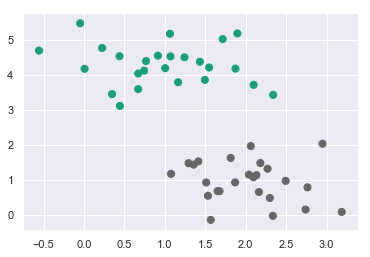

In [80]:
X , y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
sns.set_style('darkgrid')
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='Dark2') # s=50 size of the blobs or dots
plt.show()

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


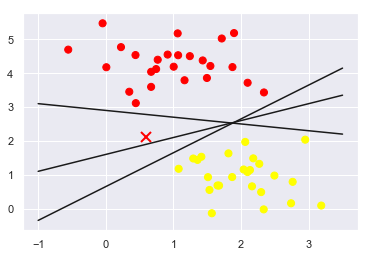

In [81]:
xfit = np.linspace(-1,3.5)
print(xfit)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m * xfit + b,'-k') #(value of x,value of y ,color)

plt.show()

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


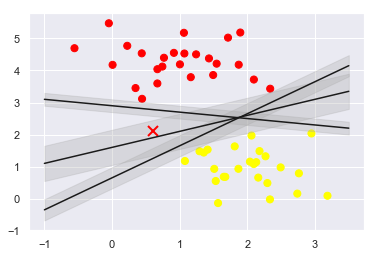

In [82]:
xfit = np.linspace(-1,3.5)
print(xfit)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m, b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m * xfit +b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit - d,yfit + d,edgecolor='none',color='#AAAAAA',alpha=0.3) 

plt.show()

In [83]:
from sklearn.svm import SVC #support vector classifier
model = SVC(kernel ='linear',C=1E10) #E-exponential 2.71^10
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax=plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    #Returns co-ordinates matrices from co-ordinates vectors
    #Make N-D co-ordinate array from vectorized N-D scalar/vector
    Y,X = np.meshgrid(y,x)
    #Row wise stack in sequence
    xy = np.vstack([X.ravel(),Y.ravel()]).T # T for Transpose
    # SVC - Decisio fn returns pair wise scores between 
    # classes - score for each class
    P=model.decision_function(xy).reshape(X.shape)
    
    
    #plot decision boundary and margins
    ax.contour(X , Y , P, colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        
        
        
        

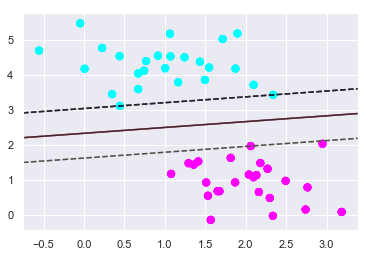

In [58]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='cool')
plot_svc_decision_function(model)
plt.show()

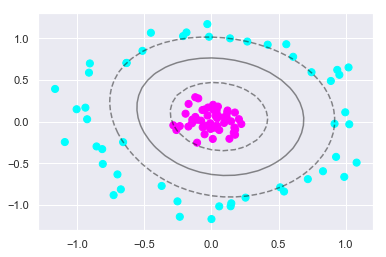

In [78]:
from sklearn.datasets.samples_generator import make_circles
X , y =make_circles(100,factor=.1,noise=.1)

clf = SVC(kernel='rbf',C=1E20) #kernel=rbf
clf.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='cool')
plot_svc_decision_function(clf,plot_support=False)
plt.show()

In [73]:
#Radial basis function centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
r

array([ 0.2704175 ,  0.39906953,  0.44914101,  0.96334793,  0.99987926,
        0.35880756,  0.97796494,  0.97798579,  0.41621345,  0.32185331,
        0.52728809,  0.25409511,  0.97657058,  0.4254529 ,  0.99427115,
        0.25002598,  0.33316837,  0.50429285,  0.99992396,  0.44929624,
        0.98614088,  0.99447499,  0.98961734,  0.39582041,  0.99048744,
        0.28937187,  0.42601926,  0.39670592,  0.357142  ,  0.98045486,
        0.44453611,  0.94407762,  0.98810484,  0.98581613,  0.39707213,
        0.39664283,  0.98778728,  0.99320768,  0.5041778 ,  0.36569634,
        0.23223978,  0.41530375,  0.96387886,  0.40720523,  0.99177102,
        0.45289512,  0.33931313,  0.34637678,  0.40163685,  0.33512697,
        0.9973305 ,  0.98888228,  0.3450514 ,  0.97000395,  0.98602315,
        0.41426856,  0.34848357,  0.3878529 ,  0.9900249 ,  0.97764839,
        0.99174037,  0.36237041,  0.31821814,  0.96237359,  0.98149333,
        0.31886429,  0.99694948,  0.98231531,  0.9364204 ,  0.98

In [74]:
from ipywidgets import interact,fixed
interact(plot_svm,N=[10,50,100,150,200],ax=fixed(none))
from mpl_toolkits import mplot3d #use for #3D graphs #mpl-matplotlib

def plot_3D(elev=60,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='cool')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D,elev=[0,90],azip=(-360,360),X=fixed(X),y=fixed(y))   

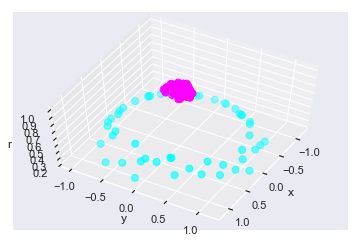